# ANOMALY DETETCTION USING GAUSSIAN DISTRIBUTION

In case of anomaly, the dataset can be both labelled as well as non labelled. In case of normal operation in the system, the data points are within the clustered range, but in case of any anomaly the data stands out of the density region.

The anomaly detection problem has a desity estimation based approach 

STEPS:

1. Training set : {x1,x2,...xn}
-> Since we go for density based approach so it does not matter whether we have labelled or un-labelled data
2. Model P(x) which is the cumulative probablity distribution function and is given by
P(X) = P(X1,u1,sig1**2) * P(X2,u2,sig2**2).....P(Xn,un,sig**n)
-> We are not sure about if all the features being independent of one another. So we go for multivariate gaussian approach


In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

from sklearn.metrics import f1_score
from sklearn.metrics import recall_score , average_precision_score
from sklearn.metrics import precision_score, precision_recall_curve

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier


from scipy.stats import multivariate_normal


In [6]:
def GetMeanAndVarianceFromDataSet(dataset):
    mu = np.mean(dataset, axis=0)
    sigma = np.cov(dataset.T)
    return mu, sigma



### scipy.stats.multivariate_normal package can be used for getting multivariate

In [9]:
#Returns a probablity distribution function
def multivariateGaussian(dataset,mu,sigma):
    p = multivariate_normal(mean=mu, cov=sigma)
    return p.pdf(dataset)

# Selecting value of epsilon
For any new point x, if 
1. P(x) < epsilon , then case of anomaly
2. P(x) >= epsilon , then normal case 

So, question is how to select the value of "epsilon"

Possible evaluation matrics,
1. TP, FP, TN, FN
2. Precision/ Recall
3. F1- score

Note: Epsilon is a hyperparameter and need to be tunned 

In [85]:
def SelectThroshold(probablity_CrossValidation, crossValidation_Target_Y):
    best_epsilon = 0
    best_f1 = 0
    best_Recall = 0
    best_Precision = 0
    f = 0
    
    farray = []
    Recallarray = []
    Precisionarray = []
    
    epsilons = (0.0000e+00, 1.0527717316e-70, 1.0527717316e-50, 1.0527717316e-24)
    
    for e in epsilons:
        predictions = (probablity_CrossValidation < e)
        f = f1_score(crossValidation_Target_Y, predictions, average = "binary")
        Recall = recall_score(crossValidation_Target_Y, predictions, average = "binary")
        Precision = precision_score(crossValidation_Target_Y, predictions, average = "binary") 
                
        farray.append(f)
        Recallarray.append(Recall)
        Precisionarray.append(Precision)
        
        print("Epsilon: ", e, "F-Score:", f, "Recall: ", Recall, "Precision: ", Precision)
        
        if f > best_f1:
            best_f1 =  f
            best_Recall = Recall
            best_Precision = Precision
            best_epsilon = e
            

    return best_f1, best_epsilon, best_Recall, best_Precision
    

In [12]:
train_df = pd.read_csv("creditcardfraud\creditcard.csv")

In [18]:
train_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [16]:
train_df.isnull().values.any()

False

In [20]:
train_df.shape

(284807, 31)

In [21]:
v_features = train_df.iloc[:,1:29].columns

### Plot distribution cuve for features 

C:\Users\z00351wf\AppData\Local\Continuum\anaconda3\envs\DIGSI_T\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


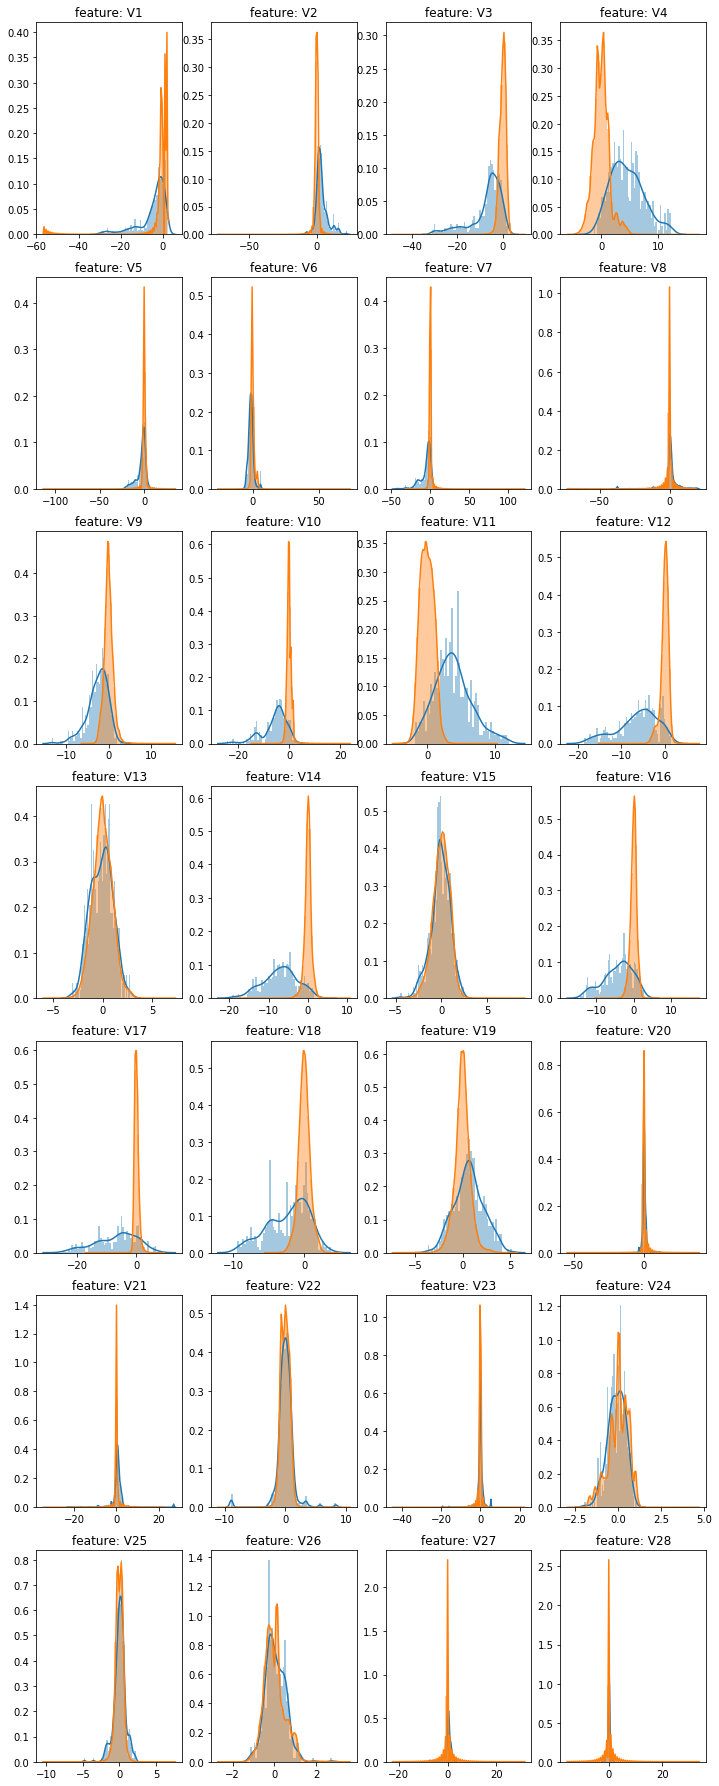

In [33]:
plt.figure(figsize=(12,8*4))
gs = gridspec.GridSpec(7, 4)
for i, cn in enumerate(train_df[v_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(train_df[cn][train_df.Class == 1], bins=50)
    sns.distplot(train_df[cn][train_df.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('feature: ' + str(cn))
plt.show()

# Feature Importance

In [38]:
random_Classifier =  RandomForestClassifier(n_estimators = 100 , criterion = 'entropy',random_state = 0)
random_Classifier.fit(train_df.iloc[:,1:29],train_df.iloc[:,30]);

In [39]:
random_Classifier.feature_importances_

array([0.01100439, 0.00994678, 0.03744517, 0.03892046, 0.00868689,
       0.0089239 , 0.02992325, 0.01204393, 0.02787159, 0.1014475 ,
       0.07745576, 0.13234433, 0.00859532, 0.14446697, 0.00868831,
       0.04224097, 0.18240053, 0.0208162 , 0.01270206, 0.01157425,
       0.01195397, 0.00796125, 0.00709086, 0.00700933, 0.00729345,
       0.01178519, 0.01059821, 0.00880919])

In [47]:
x, y = (list(x) for x in zip(*sorted(zip(random_Classifier.feature_importances_, train_df.iloc[:,1:29].columns), 
                                                            reverse = False)))
trace2 = go.Bar(
    x=x ,
    y=y,
    marker=dict(
        color=x,
        colorscale = 'Viridis',
        reversescale = True
    ),
    name='Random Forest Feature importance',
    orientation='h',
)

layout = dict(
    title='Barplot of Feature importances',
     width = 600, height = 1000,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
#         domain=[0, 0.85],
    ),
    margin=dict(
    l=300,
),
)

fig1 = go.Figure(data=[trace2], layout=layout)
iplot(fig1)

In [49]:
for feature, importance in zip(train_df.iloc[:,1:29].columns, random_Classifier.feature_importances_):
    if importance > 0.020 :
        print('"' + feature + '"'+',')

"V3",
"V4",
"V7",
"V9",
"V10",
"V11",
"V12",
"V14",
"V16",
"V17",
"V18",


In [50]:
train_df.drop(['V19','V21','V1','V2','V6','V5','V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8'], axis =1, inplace = True)

In [51]:
train_df.head()

,Time,V3,V4,V7,V9,V10,V11,V12,V14,V16,V17,V18,Amount,Class
0,0.0,2.536347,1.378155,0.239599,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,149.62,0
1,0.0,0.166480,0.448154,-0.078803,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,2.69,0
2,1.0,1.773209,0.379780,0.791461,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,378.66,0
3,1.0,1.792993,-0.863291,0.237609,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,123.50,0
4,2.0,1.548718,0.403034,0.592941,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,69.99,0


In [52]:
train_df.drop(labels = ["Amount","Time"], axis = 1, inplace = True)

In [53]:
train_df.head()

,V3,V4,V7,V9,V10,V11,V12,V14,V16,V17,V18,Class
0,2.536347,1.378155,0.239599,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0
1,0.166480,0.448154,-0.078803,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,0
2,1.773209,0.379780,0.791461,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,0
3,1.792993,-0.863291,0.237609,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,0
4,1.548718,0.403034,0.592941,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0


## Split the dataset into 2 part one with Class 1 and other with class 0

In [54]:
train_Class_1 = train_df[train_df.Class == 1]
train_Class_0 = train_df[train_df.Class == 0]

## Developing data for finding epsilon

3 parts needed
1. Training set : 60 % of the data should be dominating class or non anomaly case here(applicable for both supervised and unsupervised learning)

2. Cross validation dataset : 20% of the left over data non anomaly data + 50% of the anomaly data

3. Test Dataset : leftover(20%) + left over anomalized data(50%)


In [59]:
NormalDataSet_Count = len(train_Class_0)
AnomalousDataSet_Count = len(train_Class_1)
print("NormalDataSet_Count:", NormalDataSet_Count)
print("AnomalousDataSet_Count:", AnomalousDataSet_Count)

NormalDataSet_Count: 284315
AnomalousDataSet_Count: 492


### CV and Test for anomalous dataset

In [71]:
start_mid = AnomalousDataSet_Count // 2
start_midway = start_mid + 1

train_CV_Anomolous  = train_Class_1 [: start_mid]
train_Test_Anomolous = train_Class_1[start_midway:AnomalousDataSet_Count]

### CV and Test for Non- ANomalous dataset

In [69]:
start_mid = (NormalDataSet_Count * 60) // 100
start_midway = start_mid + 1

cv_mid = (NormalDataSet_Count * 80) // 100
cv_midway = cv_mid + 1


train_TrainingSet = train_Class_0[:start_mid]
train_CV_NonAnomolous    = train_Class_0[start_midway:cv_mid]
train_test_NonAnomolous  = train_Class_0[cv_midway:NormalDataSet_Count]

In [72]:
train_cv = pd.concat([train_CV_NonAnomolous,train_CV_Anomolous],axis=0)
train_test = pd.concat([train_test_NonAnomolous,train_Test_Anomolous],axis=0)

In [73]:
print(train_TrainingSet.columns.values)
print(train_cv.columns.values)
print(train_test.columns.values)

['V3' 'V4' 'V7' 'V9' 'V10' 'V11' 'V12' 'V14' 'V16' 'V17' 'V18' 'Class']
['V3' 'V4' 'V7' 'V9' 'V10' 'V11' 'V12' 'V14' 'V16' 'V17' 'V18' 'Class']
['V3' 'V4' 'V7' 'V9' 'V10' 'V11' 'V12' 'V14' 'V16' 'V17' 'V18' 'Class']


In [74]:
train_CV_Y = train_cv["Class"]
train_test_Y = train_test["Class"]

In [75]:
train_cv.drop(labels = ["Class"], axis = 1, inplace = True)
train_TrainingSet.drop(labels = ["Class"], axis = 1, inplace = True)
train_test.drop(labels = ["Class"], axis = 1, inplace = True)

C:\Users\z00351wf\AppData\Local\Continuum\anaconda3\envs\DIGSI_T\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



# Choose epsilon

In [77]:
mu , sigma = GetMeanAndVarianceFromDataSet(train_TrainingSet)

In [78]:
p = multivariateGaussian(train_TrainingSet, mu, sigma)

In [79]:
p_CV = multivariateGaussian(train_cv,mu, sigma)

In [80]:
p_test = multivariateGaussian(train_test,mu,sigma)

In [86]:
f1, epsilon, Recall, Precision = SelectThroshold(p_CV,train_CV_Y)

Epsilon:  0.0 F-Score: 0.0 Recall:  0.0 Precision:  0.0
Epsilon:  1.0527717316e-70 F-Score: 0.8294736842105263 Recall:  0.8008130081300813 Precision:  0.8602620087336245
Epsilon:  1.0527717316e-50 F-Score: 0.769811320754717 Recall:  0.8292682926829268 Precision:  0.7183098591549296
Epsilon:  1.0527717316e-24 F-Score: 0.4899882214369847 Recall:  0.8455284552845529 Precision:  0.3449419568822554


C:\Users\z00351wf\AppData\Local\Continuum\anaconda3\envs\DIGSI_T\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\z00351wf\AppData\Local\Continuum\anaconda3\envs\DIGSI_T\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples.



# In practical case one needs to try various values of epsilon and when it gives best F_score it needs to be selected and tried on test data 

# Taking epsilon = 1.0527717316e-70 from previous tried cases

In [88]:
print(epsilon)

1.0527717316e-70


In [89]:
predictions = (p_test < epsilon)
Recall = recall_score(train_test_Y, predictions, average = "binary")    
Precision = precision_score(train_test_Y, predictions, average = "binary")
F1score = f1_score(train_test_Y, predictions, average = "binary")    
print ('F1 score , Recall and Precision for Test dataset')
print ('Best F1 Score %f' %F1score)
print ('Best Recall Score %f' %Recall)
print ('Best Precision Score %f' %Precision)

F1 score , Recall and Precision for Test dataset
Best F1 Score 0.767816
Best Recall Score 0.681633
Best Precision Score 0.878947
